# Iris Flower Classification
## Part 1 - Data Analysis and Exploration

In [735]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn import datasets
# Used for scaling a dataset
from sklearn.preprocessing import MinMaxScaler

In [736]:
# Load the scikit-learn iris flower dataset
data = datasets.load_iris()

data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Data wrangling

In [737]:
# Create a data frame with dataset feature names as its columns
df = pd.DataFrame(data.data, columns = data.feature_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [738]:
# Scale datapoints between 0 and 1
# (i.e. make smallest value 0 and largest value 1)

scaler = MinMaxScaler()
# Fit the scaler to the data frame
scaler.fit(df)
# Make the scaled data
scaled = scaler.fit_transform(df)

scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [739]:
# Turn it into a data frame again
scaled_df = pd.DataFrame(scaled, columns = df.columns)

scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [740]:
# Add a new column to the data frame with values from the original dataset
# Target indicates the iris species (here: target names)
scaled_df["target"] = data.target

scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [741]:
# We want the targets to be shown as the actual target names (setosa, versicolor, virginica),
# so we map the integers (0, 1, 2) to the target names
# The zip function pairs 0 with data.target_names[0], 1 with data.target_names[1], and 2 with data.target_names[2]
# Finally, wrap the whole thing in a dictionary
target_dict = dict(zip([0, 1, 2], data.target_names))

target_dict

{0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')}

In [742]:
# Map the dictionary to the target column
scaled_df["target_name"] = scaled_df["target"].map(target_dict)

scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,0.222222,0.625000,0.067797,0.041667,0,setosa
1,0.166667,0.416667,0.067797,0.041667,0,setosa
2,0.111111,0.500000,0.050847,0.041667,0,setosa
3,0.083333,0.458333,0.084746,0.041667,0,setosa
4,0.194444,0.666667,0.067797,0.041667,0,setosa
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,virginica
146,0.555556,0.208333,0.677966,0.750000,2,virginica
147,0.611111,0.416667,0.711864,0.791667,2,virginica
148,0.527778,0.583333,0.745763,0.916667,2,virginica


### Pie chart

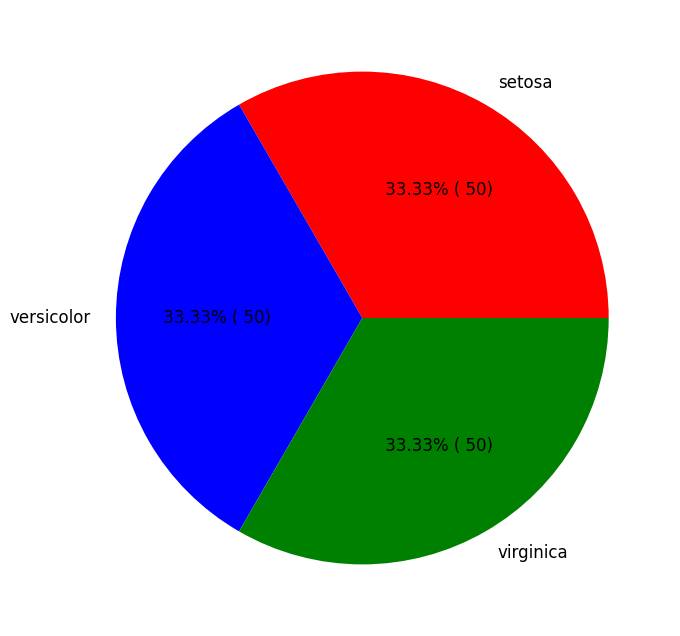

In [743]:
# Change figure size to 8 by 8
plt.figure(figsize = (8, 8))
# Create a pie chart
# value_counts() counts each unique value in the target column
# The unique values are 0, 1, and 2, so 3 total (i.e. make a 3-part pie chart)
# Also set labels, text style, and colors
plt.pie(scaled_df.target.value_counts(), labels = data.target_names, textprops = {"fontsize": 12}, colors = ["r", "b", "g"],
        # Autopercent will show us percentage values
        # We're using a lambda (anonymous) function here
        # x as its argument, returns a formatted string
        # The string is made up of a 2-point floating point (2 decimals) and a 0-point floating point (0 decimals)
        # The first floating point will tell us what's the percentage of each unique value out of all data points
        # The second one will indicate the actual number of the unique value
        autopct = lambda x: "{p: .2f}% ({v: .0f})".format(p = x, v = x * len(scaled_df) / 100))

plt.show()

In [744]:
# Group by target_name column (i.e. make a row for every unique value: setosa, versicolor, and virginica)
# and show means of values of the other (numeric) columns
means = scaled_df.groupby(["target_name"]).mean()

# Remove unnecessary target column
means = means.drop("target", axis = 1)

means


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target_name,,,,
setosa,0.196111,0.595000,0.078305,0.060833
versicolor,0.454444,0.320833,0.552542,0.510833
virginica,0.635556,0.405833,0.771525,0.802500


### Bar chart

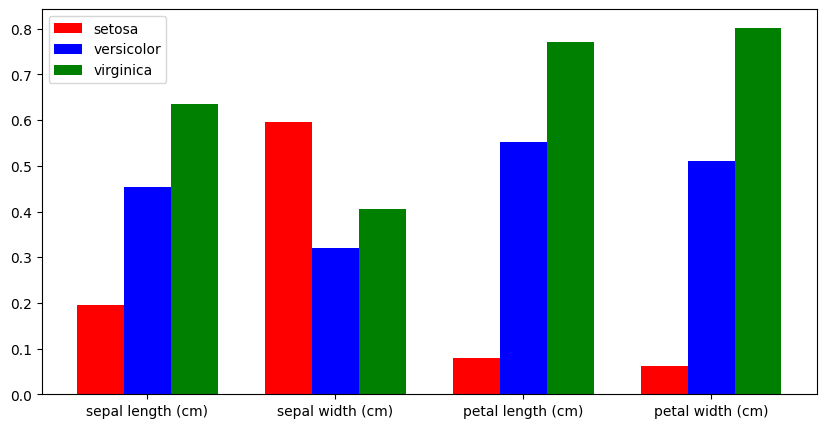

In [745]:
# Column names from the previous data frame
features = means.columns
# X-axis is divided into 4 
x_axis = np.array([1, 2, 3, 4])
# Set means data frame values as y-axis values
y_axis = means.values

plt.figure(figsize = (10, 5))
# Create three different bar charts in the same figure
# (i.e. show three bars on each x-axis value)
# Offset (- .25 and + .25) the charts to prevent them overlapping with each other
plt.bar(x_axis - .25, y_axis[0], width = .25, color = "r")
plt.bar(x_axis, y_axis[1], width = .25, color = "b")
plt.bar(x_axis + .25, y_axis[2], width = .25, color = "g")
# Name the x-axis values as the features (sepal length (cm), sepal width (cm), etc.)
plt.xticks(x_axis, features)
# Show a legend on the chart
plt.legend(data.target_names)

plt.show()

### Graphs

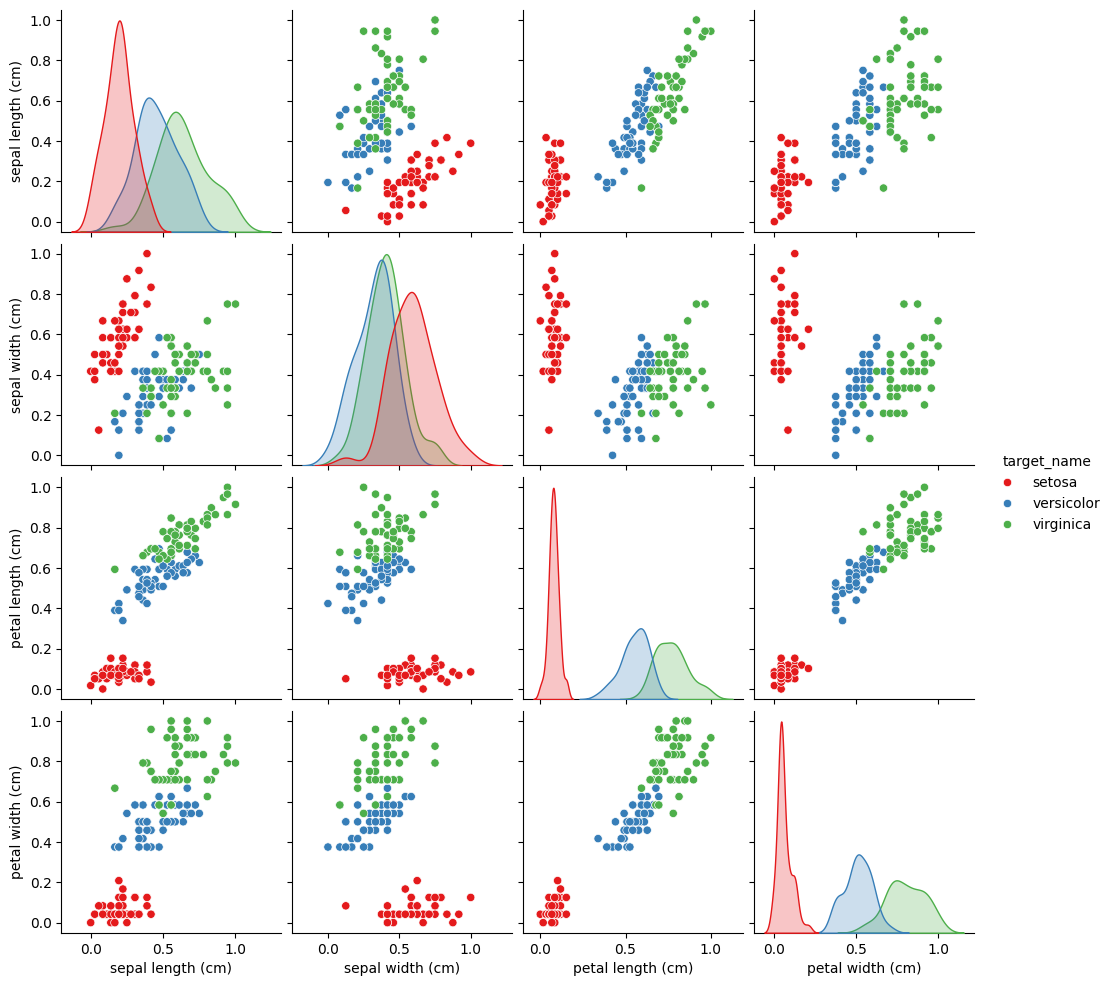

In [746]:
# Graph features by features (i.e. pairwise relationships)
# Note that the second to last column (target) is omitted
# Colors (hue) of the data points are set to respective target names
# Use a specific color palette
sns.pairplot(scaled_df[scaled_df.columns[[0, 1, 2, 3, 5]]], hue = "target_name", palette = "Set1")

plt.show() # Seaborn uses Matplotlib in the background

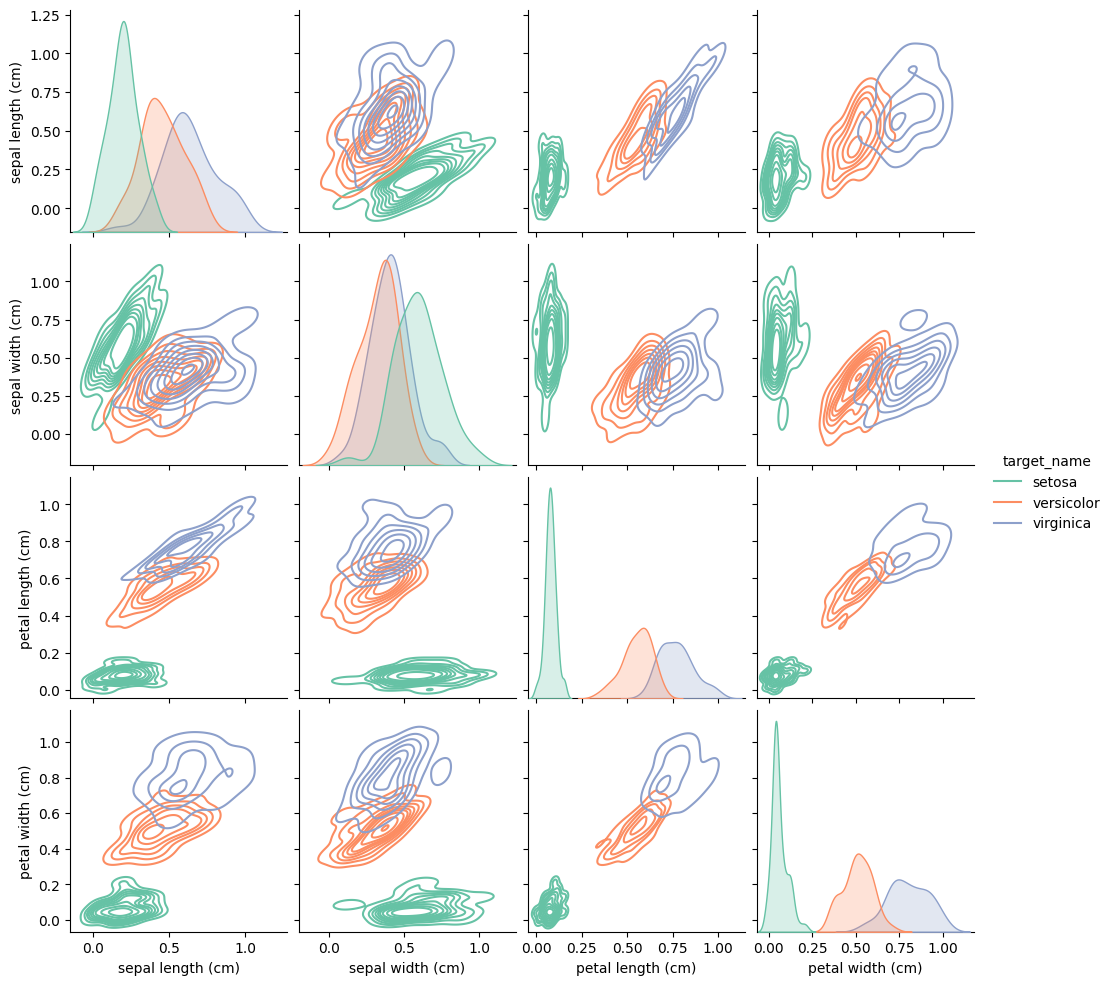

In [747]:
# Change graph type by adding kind argument with value kde; alternatives are scatter (default), hist, reg
# Kde means kernel density
# Also change the color palette
sns.pairplot(scaled_df[scaled_df.columns[[0, 1, 2, 3, 5]]], hue = "target_name", palette = "Set2", kind = "kde")

plt.show()

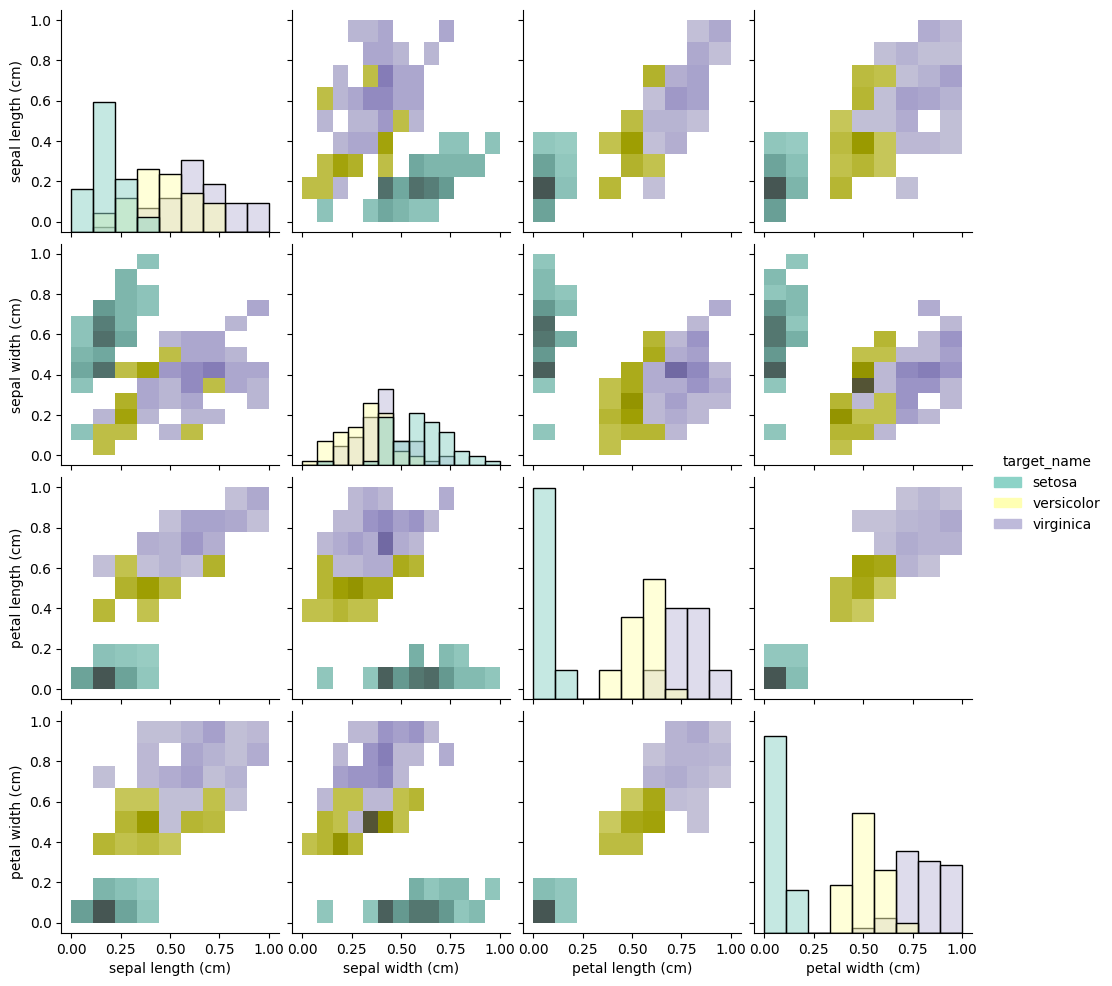

In [748]:
# Kind with value hist (histogram)
sns.pairplot(scaled_df[scaled_df.columns[[0, 1, 2, 3, 5]]], hue = "target_name", palette = "Set3", kind = "hist")

plt.show()

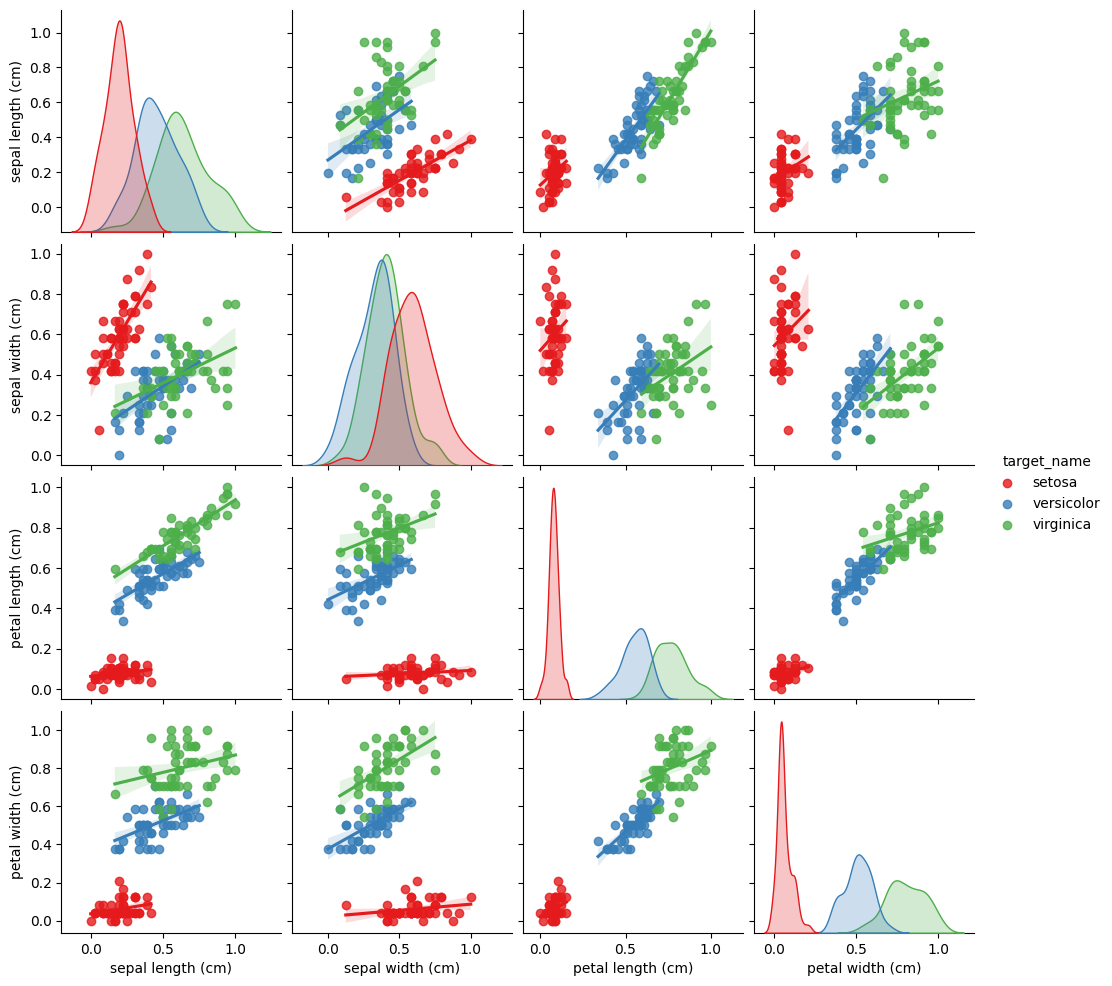

In [749]:
# With reg (regression)
sns.pairplot(scaled_df[scaled_df.columns[[0, 1, 2, 3, 5]]], hue = "target_name", palette = "Set1", kind = "reg")

plt.show()

## Part 2 - Decision Tree Classifier

In [750]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [751]:
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,0.222222,0.625000,0.067797,0.041667,0,setosa
1,0.166667,0.416667,0.067797,0.041667,0,setosa
2,0.111111,0.500000,0.050847,0.041667,0,setosa
3,0.083333,0.458333,0.084746,0.041667,0,setosa
4,0.194444,0.666667,0.067797,0.041667,0,setosa
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,virginica
146,0.555556,0.208333,0.677966,0.750000,2,virginica
147,0.611111,0.416667,0.711864,0.791667,2,virginica
148,0.527778,0.583333,0.745763,0.916667,2,virginica


### Prepare the x and y values

In [752]:
# x will be used as input (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)),
# y will be output (target)

# Select all rows, columns up until the fourth column (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm))
X = scaled_df.values[:, :4].astype(np.float32) # Make sure that the type is float32
# Select all rows and only the fifth column (target)
y = scaled_df.values[:, 4].astype(int) # Make sure that the type is int

### Do the train test split

In [753]:
# Define the test set to be 20 % (the train set will be 80 %)
# Fix the split randomness with random_state = 1 (omit if you want it to be random)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

# There'll be 120 training points and 30 testing points
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


### Build the classifier

In [754]:
# Create the classifier
clf = DecisionTreeClassifier(random_state = 1)
# Train the classifier and then score it with the test set
clf.fit(X_train, y_train).score(X_test, y_test)


0.9666666666666667

### Randomized search predictions and scoring

In [755]:
# We're now trying to find out what'd be the optimal solution (i.e. optimal set of parameters) for the training

# Set hyperparameters to fine-tune the decision tree
# criterion: instructions on how to split your nodes within the decision tree (trying with gini and entropy)
# splitter: how the nodes are going to be split (trying with best and random)
# max_depth: how deep the tree is, i.e., how far it'll go with all of its nodes (trying with integers 5, 10, 15, etc., all the way up to 90)
# min_samples_split: minimum number of samples to split (trying with integers 2, 3, 4, etc., up to 10)
# max_features: maximum number of features that we're going to be looking at within the trees (trying with auto, square root, and base-2 logarithm)
params = {"criterion": ["gini", "entropy"],
          "splitter": ["best", "random"],
          "max_depth": np.linspace(5, 90, 18).astype(np.int32),
          "min_samples_split": np.arange(2, 10),
          "max_features": ["auto", "sqrt", "log2"]}

# Use the randomized search
# It'll randomly take a selection of the hyperparametes and try to find which ones that work out the best
# scoring = "accuracy" defines that the search will select the best parameters based on accuracy
# cv = 5 stands for 5-fold cross-validation
rand_search = RandomizedSearchCV(DecisionTreeClassifier(random_state = 1), params, scoring = "accuracy", random_state = 1, cv = 5)
# Train the search model
rand_search.fit(X_train, y_train)

# The most optimal parameters the model found
rand_params = rand_search.best_params_
# Print the optimal parameters the model found
print(rand_params, "\n")

# Print the best training accuracy, i.e., score the model found
print("Train accuracy:", rand_search.best_score_)
# Predict with the test data (will be iris species, 0, 1, or 2)
preds = rand_search.predict(X_test)
# Print the testing accuracy
print("Test accuracy:", accuracy_score(preds, y_test))

{'splitter': 'random', 'min_samples_split': np.int64(4), 'max_features': 'log2', 'max_depth': np.int32(85), 'criterion': 'entropy'} 

Train accuracy: 0.9666666666666668
Test accuracy: 0.9666666666666667


/Users/fosse/Desktop/python/iris-flower-classification/iris-flower-classification-venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fosse/Desktop/python/iris-flower-classification/iris-flower-classification-venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fosse/Desktop/python/iris-flower-classification/iris-flower-classification-venv/lib/python3.13/site

### Grid search predictions and scoring

In [756]:
# Opposed to randomized search,
# grid search will try out every single combination of hyperparameters it's given

# max_depth and min_samples_split were the only numeric parameters
# For those parameters, let's take the values the randomized search gave us,
# and make the parameters new ranges from 3 below to 3 over the values
# The other parameters shall have the values the randomized search came back with

# Define a new range for the tree max depth
max_depth = np.arange(rand_params["max_depth"] - 3, rand_params["max_depth"] + 3)
# Define a new range for the minimum number of samples to split
min_samples_split = np.arange(rand_params["min_samples_split"] - 3, rand_params["min_samples_split"] + 3)

# Use the criterion, splitter, and max_features values the randomized search ended up with
# max_depth and min_samples_split should always stay positive
params = {"criterion": [rand_params["criterion"]],
          "splitter": [rand_params["splitter"]],
          "max_depth": max_depth[max_depth >= 2],
          "min_samples_split": min_samples_split[min_samples_split >= 2],
          "max_features": [rand_params["max_features"]]}

# Note that this time GridSearchCV doesn't take random_state as a parameter
# (don't mix with DecisionTreeClassifier parameters),
# because grid search goes through every hyperparameter
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 1), params, scoring = "accuracy", cv = 5)
grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params, "\n")

print("Train accuracy:", grid_search.best_score_)
preds = grid_search.predict(X_test)
print("Test accuracy:", accuracy_score(preds, y_test))

{'criterion': 'entropy', 'max_depth': np.int64(82), 'max_features': 'log2', 'min_samples_split': np.int64(4), 'splitter': 'random'} 

Train accuracy: 0.9666666666666668
Test accuracy: 0.9666666666666667


In [757]:
# How well the classification performed?
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



## Part 3 - K-Nearest Neighbors Classifier

In [758]:
from sklearn.neighbors import KNeighborsClassifier

In [759]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train).score(X_test, y_test)

0.9666666666666667

In [ ]:
params = {"n_neighbors": np.arange(1, 15),
          "weights": ["uniform", "distance"],
          "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
          "metric": ["minkowski", "euclidean", "manhattan", "chebyshev"], # Distance functions (i.e. different ways to evaluate distances between points)
          "leaf_size": np.linspace(10, 150, 15).astype(int)}

rand_search = RandomizedSearchCV(KNeighborsClassifier(), params, scoring = "accuracy",
                                 random_state = 1, cv = 5)
rand_search.fit(X_train, y_train)

rand_params = rand_search.best_params_
print(rand_params, "\n")
print("Train accuracy:", rand_search.best_score_)
preds = rand_search.predict(X_test)
print("Test accuracy:", accuracy_score(preds, y_test))

{'weights': 'uniform', 'n_neighbors': np.int64(7), 'metric': 'euclidean', 'leaf_size': np.int64(20), 'algorithm': 'brute'} 

Train accuracy: 0.9583333333333334
Test accuracy: 1.0


In [761]:
n_neighbors = np.arange(rand_params["n_neighbors"] - 3, rand_params["n_neighbors"] + 3)

leaf_size = np.arange(rand_params["leaf_size"] - 3, rand_params["leaf_size"] + 3)

params = {"n_neighbors": n_neighbors,
          "weights": [rand_params["weights"]],
          "algorithm": [rand_params["algorithm"]],
          "metric": [rand_params["metric"]],
          "leaf_size": leaf_size}

grid_search = GridSearchCV(KNeighborsClassifier(), params, scoring = "accuracy", cv = 5)
grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params, "\n")
print("Train accuracy:", grid_search.best_score_)
preds = grid_search.predict(X_test)
print("Test accuracy:", accuracy_score(preds, y_test))

{'algorithm': 'brute', 'leaf_size': np.int64(17), 'metric': 'euclidean', 'n_neighbors': np.int64(7), 'weights': 'uniform'} 

Train accuracy: 0.9583333333333334
Test accuracy: 1.0


In [762]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

